In [269]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [337]:
df = pd.read_csv("C:\\Users\\İdris Aydın\\Desktop\\Latest Football  Players 2024 Data.csv")
df

,Teams,Seasons,Players,Matches,Goals,Assists,Seasons Ratings
0,InterMiami,2024,Lionel Messi,15,14,11,8.5
1,InterMiami,2023,Lionel Messi,14,11,5,8.0
2,PSG,2022/2023,Lionel Messi,41,21,20,8.1
3,PSG,2021/2022,Lionel Messi,34,11,14,7.9
4,Barcelona,2020/2021,Lionel Messi,47,38,12,8.4
...,...,...,...,...,...,...,...
1211,Real Sociedad,2020/2021,Mikel Oyarzabal,43,13,10,7.1
1212,Real Sociedad,2019/2020,Mikel Oyarzabal,45,13,13,7.1
1213,Real Sociedad,2018/2019,Mikel Oyarzabal,41,14,2,6.7
1214,Real Sociedad,2017/2018,Mikel Oyarzabal,43,14,6,7.0


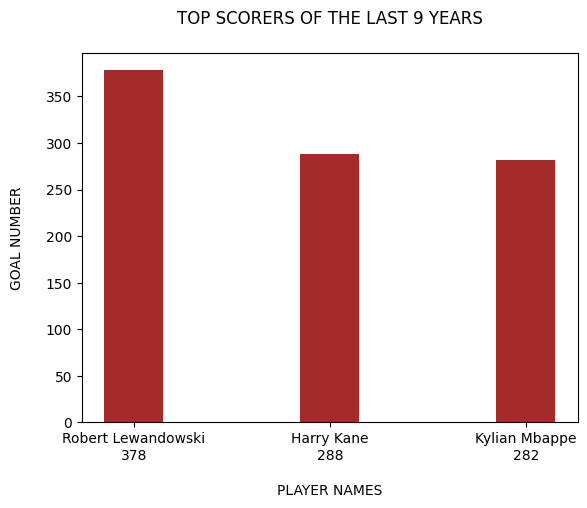

In [271]:
goal_kings = []

for player in df['Players'].unique():
    s = []
    goal_number = df[(df['Players'] == player)]['Goals'].sum()
    s.append(player)
    s.append(goal_number)
    goal_kings.append(s)

goal_kings = sorted(goal_kings, key = lambda x : x[1], reverse = True)

goal_kings_name = [goal_kings[0][0] + "\n" + str(goal_kings[0][1]), goal_kings[1][0] + "\n" + str(goal_kings[1][1]), goal_kings[2][0] + "\n" + str(goal_kings[2][1])]
goal_kings_goalNumber = [goal_kings[0][1], goal_kings[1][1], goal_kings[2][1]]

plt.bar(goal_kings_name, goal_kings_goalNumber, color = 'brown', width = 0.3)
plt.xlabel("\nPLAYER NAMES")
plt.ylabel("GOAL NUMBER\n")
plt.title("TOP SCORERS OF THE LAST 9 YEARS\n")

plt.show()

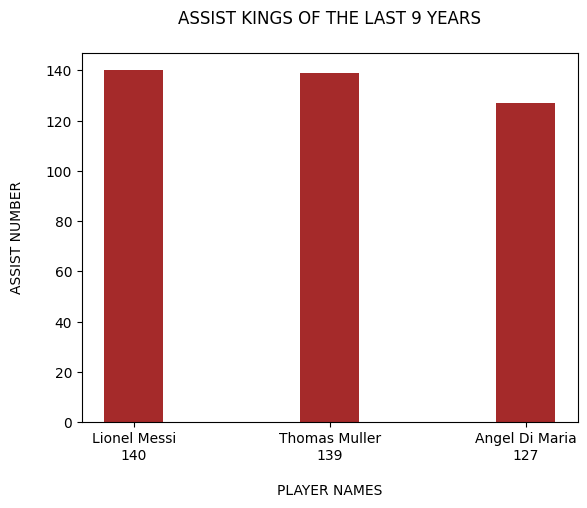

In [272]:
assist_kings = []

for player in df['Players'].unique():
    s = []
    assist_number = df[(df['Players'] == player)]['Assists'].sum()
    s.append(player)
    s.append(assist_number)
    assist_kings.append(s)

assist_kings = sorted(assist_kings, key = lambda x : x[1], reverse = True)

assist_kings_name = [assist_kings[0][0] + "\n" + str(assist_kings[0][1]), assist_kings[1][0] + "\n" + str(assist_kings[1][1]), assist_kings[2][0] + "\n" + str(assist_kings[2][1])]
assist_kings_assistNumber = [assist_kings[0][1], assist_kings[1][1], assist_kings[2][1]]

plt.bar(assist_kings_name, assist_kings_assistNumber, color = 'brown', width = 0.3)
plt.xlabel("\nPLAYER NAMES")
plt.ylabel("ASSIST NUMBER\n")
plt.title("ASSIST KINGS OF THE LAST 9 YEARS\n")

plt.show()

In [338]:
X = df[['Goals']]
y = df[['Seasons Ratings']]

In [339]:
corr_goal_and_rating = df['Goals'].corr(df['Seasons Ratings'])
print(corr_goal_and_rating)

0.5103390981184952


In [340]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

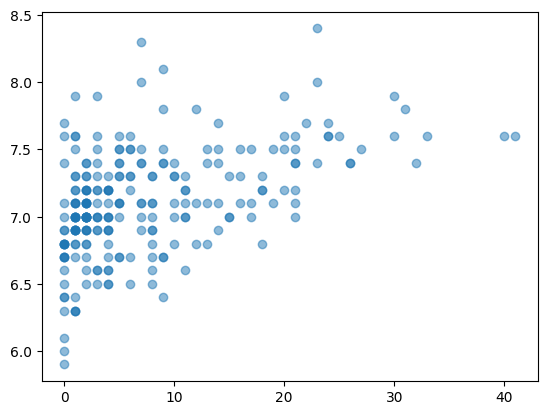

In [341]:
plt.scatter(X_test, y_test, alpha = 0.5)
plt.show()

In [345]:
model = LinearRegression()

In [346]:
model.fit(X_train, y_train)

LinearRegression()

In [347]:
prediction = model.predict(X_test)

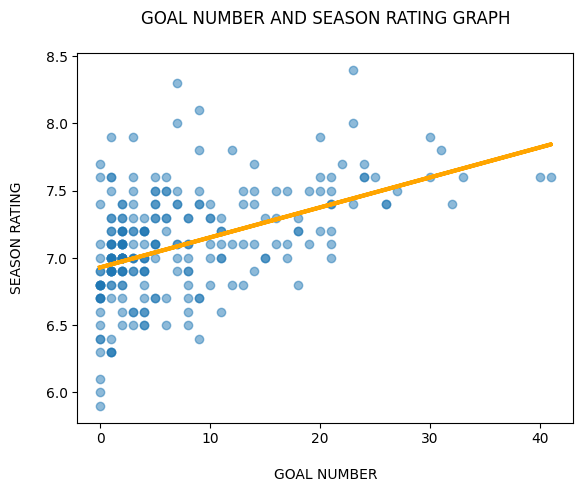

In [351]:
plt.scatter(X_test, y_test, alpha = 0.5)
plt.plot(X_test, prediction, color = 'orange', linewidth = 3)
plt.xlabel("\nGOAL NUMBER")
plt.ylabel("SEASON RATING\n")
plt.title("GOAL NUMBER AND SEASON RATING GRAPH\n")

plt.show()

In [352]:
X2 = df[['Assists']]
y2 = df[['Seasons Ratings']]

In [353]:
corr_assists_and_rating = df['Assists'].corr(df['Seasons Ratings'])
print(corr_assists_and_rating)

0.5536513033553833


In [366]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size = 0.2, random_state = 42)

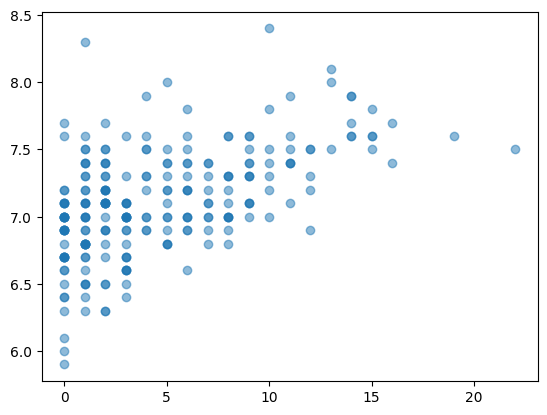

In [368]:
plt.scatter(X_test, y_test, alpha = 0.5)
plt.show()

In [369]:
model = LinearRegression()

In [374]:
model.fit(X2, y2)

LinearRegression()

In [375]:
prediction = model.predict(X_test)

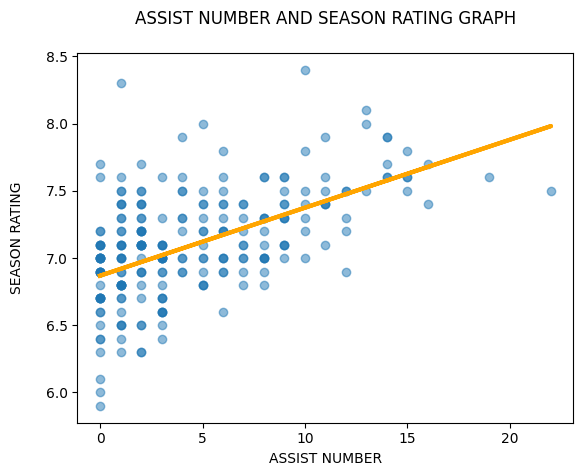

In [377]:
plt.scatter(X_test, y_test, alpha = 0.5)
plt.plot(X_test, prediction, color = 'orange', linewidth = 3)
plt.xlabel("ASSIST NUMBER")
plt.ylabel("SEASON RATING\n")
plt.title("ASSIST NUMBER AND SEASON RATING GRAPH\n")

plt.show()

In [392]:
X3 = df[['Goals', 'Assists']]
y3 = df[['Seasons Ratings']]

In [393]:
corr_matrix = df[['Goals','Assists','Seasons Ratings']].corr()
print(corr_matrix)

                    Goals   Assists  Seasons Ratings
Goals            1.000000  0.562081         0.510339
Assists          0.562081  1.000000         0.553651
Seasons Ratings  0.510339  0.553651         1.000000


In [420]:
X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size = 0.2, random_state =  42)

In [421]:
model = LinearRegression()

In [422]:
model.fit(X_train, y_train)

LinearRegression()

In [423]:
prediction = model.predict(X_test)

In [424]:
import seaborn as sns

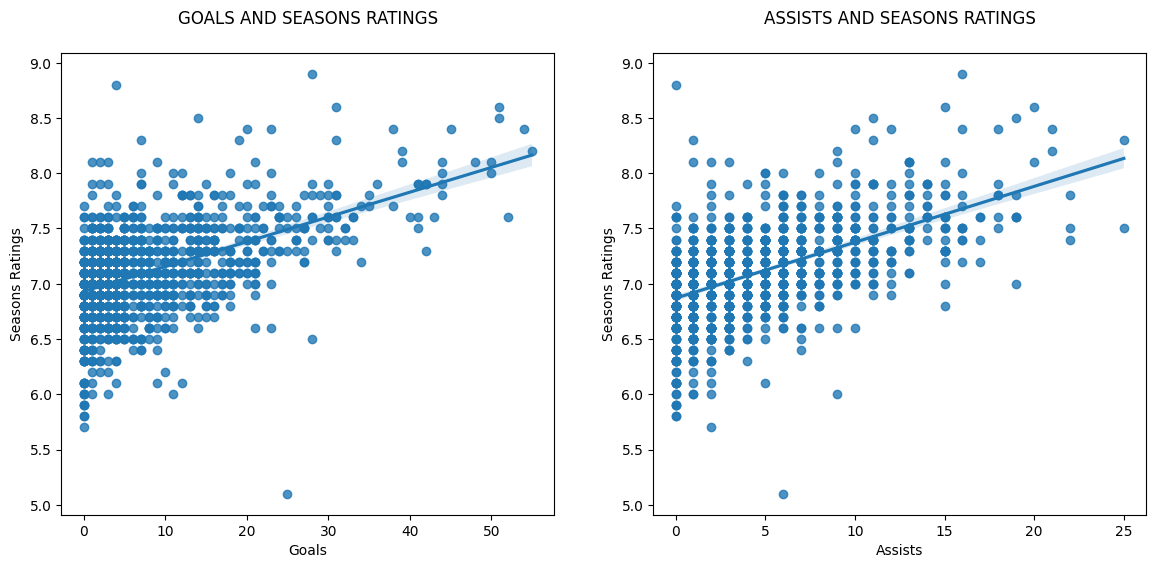

In [426]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.regplot(x = 'Goals', y = 'Seasons Ratings', data=df)
plt.title("GOALS AND SEASONS RATINGS\n")

plt.subplot(1,2,2)
sns.regplot(x = 'Assists', y = 'Seasons Ratings', data=df)
plt.title("ASSISTS AND SEASONS RATINGS\n")

plt.show()

In [427]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, prediction)
mse = mean_squared_error(y_test, prediction)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, prediction)

print(f"Mean Absolute Error:{mae}")
print(f"Mean Squared Error:{mse}")
print(f"Root Mean Squared Error:{rmse}")
print(f"R^2 Score:{r2}")

Mean Absolute Error:0.23972503874116727
Mean Squared Error:0.10279852852864692
Root Mean Squared Error:0.32062209613288806
R^2 Score:0.3321949186952151
